# VS_ProjectETL v1

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np
# import gmaps
# import os
import csv
import json
# import requests
# import time
# import scipy.stats as st
# from scipy.stats import linregress
from sqlalchemy import create_engine
#!pip install psycopg2

In [2]:
# File to Load
Happiness2020_csv = "Resources/2020.csv"
Happiness2021_csv = "Resources/2021.csv"
col = "Resources/Cost_of_Living_Index_2022.csv"

# Creating Dataframes
Happiness2020_df = pd.read_csv(Happiness2020_csv)
Happiness2021_df = pd.read_csv(Happiness2021_csv)
col_df = pd.read_csv(col)

In [3]:
Happiness2020_df[["Country name","Ladder score"]]
Happiness2021_df[["Country name","Ladder score"]]

,Country name,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
...,...,...
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145


In [4]:
# Merge 2020 & 2021 Dataframes
Happiness2020to2021_df = pd.merge(Happiness2020_df,Happiness2021_df, how="outer", on="Country name")
Happiness2020to2021_df[["Country name","Ladder score_x","Ladder score_y"]]

,Country name,Ladder score_x,Ladder score_y
0,Finland,7.8087,7.842
1,Denmark,7.6456,7.620
2,Switzerland,7.5599,7.571
3,Iceland,7.5045,7.554
4,Norway,7.4880,7.392
...,...,...,...
149,Rwanda,3.3123,3.415
150,Zimbabwe,3.2992,3.145
151,South Sudan,2.8166,NaN
152,Afghanistan,2.5669,2.523


In [5]:
# Get average of "happiness index" between COVID pandemic years 2020 & 2021
somethingsimple = (Happiness2020to2021_df["Ladder score_x"] + Happiness2020to2021_df["Ladder score_y"])/2
Happiness2020to2021_df["average"] = somethingsimple
COVIDHappiness_df = Happiness2020to2021_df[["Country name","average"]]
COVIDHappiness_df

,Country name,average
0,Finland,7.82535
1,Denmark,7.63280
2,Switzerland,7.56545
3,Iceland,7.52925
4,Norway,7.44000
...,...,...
149,Rwanda,3.36365
150,Zimbabwe,3.22210
151,South Sudan,NaN
152,Afghanistan,2.54495


In [6]:
# Drop null rows 
CleanCOVID = COVIDHappiness_df.dropna(how="any")
CleanCOVID

,Country name,average
0,Finland,7.82535
1,Denmark,7.63280
2,Switzerland,7.56545
3,Iceland,7.52925
4,Norway,7.44000
...,...,...
146,Botswana,3.47295
147,Tanzania,3.54960
149,Rwanda,3.36365
150,Zimbabwe,3.22210


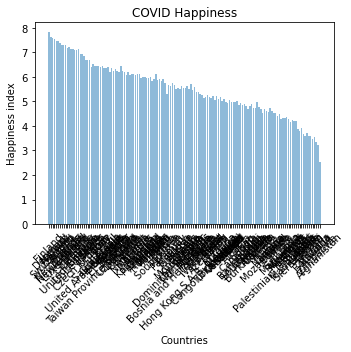

In [39]:
# Created a bar plot showing the total number of uber pickups per day over 1 Month in NYC using pyplot.
x_axis = CleanCOVID["Country name"]
y_axis = CleanCOVID["average"].values

plt.figure(figsize=(5,5))
plt.bar(x_axis, y_axis, align="center", alpha=0.5)
plt.xticks(rotation=45,fontsize=10)


plt.title("COVID Happiness")
plt.xlabel("Countries")
plt.ylabel("Happiness index")
plt.tight_layout()

plt.show()

# print("The below graph observes the impact of summer holidays due to the significant surge or uplift of uber pickups")
# print("It can also be observed that there is a wave trend of certain days of the week having higher number of uber pickups")

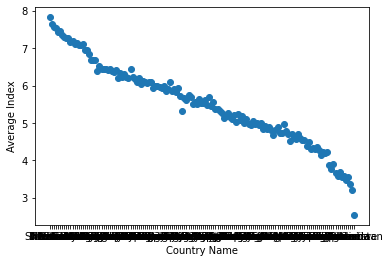

In [22]:
# Scatter plotting
x_axis_scatter = CleanCOVID["Country name"]
y_axis_scatter = CleanCOVID["average"]

plt.scatter(x_axis_scatter,y_axis_scatter)
plt.xlabel("Country Name")
plt.ylabel("Average Index")

plt.show()

In [27]:
# Top 10 Happiest Countries
top10_happiness = CleanCOVID.sort_values("average",ascending=False).head(10)
top10_happiness

,Country name,average
0,Finland,7.82535
1,Denmark,7.63280
2,Switzerland,7.56545
3,Iceland,7.52925
5,Netherlands,7.45645
4,Norway,7.44000
6,Sweden,7.35825
7,New Zealand,7.28830
8,Austria,7.28110
9,Luxembourg,7.28075


In [28]:
# Bottom 10 Happiest Countries
bottom10_happiness = CleanCOVID.sort_values("average",ascending=True).head(10)
bottom10_happiness

,Country name,average
152,Afghanistan,2.54495
150,Zimbabwe,3.22210
149,Rwanda,3.36365
146,Botswana,3.47295
147,Tanzania,3.54960
144,Malawi,3.56900
142,Lesotho,3.58240
145,Yemen,3.59270
141,Haiti,3.66790
143,India,3.69615


In [36]:
# Top 10 cost of living countries
top10_col = col_df.sort_values("Cost of Living Index",ascending=False).head(10)
top10_col = top10_col.rename(columns={"Country":"Country name"})
#top10_col
merge_top10_col = pd.merge(top10_col,CleanCOVID, on="Country name", how="left")
merge_top10_col = merge_top10_col.rename(columns={"average":"Average Happiness Index"})
merge_top10_col

,Rank,Country name,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Average Happiness Index
0,1,Bermuda,146.04,98.58,123.80,148.66,159.17,81.07,NaN
1,2,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44,7.56545
2,3,Norway,100.90,34.68,69.86,97.31,105.49,83.11,7.44000
3,4,Iceland,94.86,41.93,70.05,90.22,99.42,77.06,7.52925
4,5,Barbados,92.37,21.99,59.38,87.81,78.18,32.08,NaN
5,6,Jersey,92.02,65.33,79.51,76.88,94.65,79.14,NaN
6,7,Israel,88.05,33.94,62.69,76.72,95.31,75.58,7.14280
7,8,Denmark,84.12,33.23,60.26,68.60,98.75,99.45,7.63280
8,9,Bahamas,84.00,35.34,61.19,70.59,89.09,45.07,NaN
9,10,Singapore,83.98,66.43,75.75,77.08,61.17,91.34,6.37705


In [42]:
# Bottom 10 cost of living countries
bottom10_col = col_df.sort_values("Cost of Living Index",ascending=True).head(10)
bottom10_col = bottom10_col.rename(columns={"Country":"Country name"})
#top10_col
merge_bottom10_col = pd.merge(bottom10_col,CleanCOVID, on="Country name", how="left")
merge_bottom10_col = merge_bottom10_col.rename(columns={"average":"Average Happiness Index"})
merge_bottom10_col

,Rank,Country name,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Average Happiness Index
0,139,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63,5.31365
1,138,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04,2.54495
2,137,India,24.43,5.30,15.47,26.43,17.56,49.72,3.69615
3,136,Colombia,26.72,8.18,18.03,23.47,19.44,28.85,6.08770
4,135,Algeria,26.87,4.59,16.43,28.82,14.48,24.63,4.94605
5,134,Kosovo (Disputed Territory),27.05,8.04,18.14,24.84,19.53,43.86,NaN
6,133,Uzbekistan,27.31,9.29,18.86,26.83,24.22,22.37,6.21830
7,132,Tunisia,27.87,5.32,17.30,27.36,15.96,27.83,4.49410
8,131,Nepal,28.29,3.96,16.89,26.45,20.41,22.96,5.20310
9,130,Turkey,28.31,6.63,18.15,22.64,18.40,32.88,5.03990


In [8]:
#print(Happiness2020_df)

In [9]:
clean_col_df=col_df.rename(columns={"Rank":"rank",
                                    "Country":"country",
                                    "Cost of Living Index":"cost_of_living_index",
                                    "Rent Index":"rent_index",
                                    "Cost of Living Plus Rent Index":"cost_of_living_plus_rent_index",
                                    "Groceries Index":"groceries_index",
                                    "Restaurant Price Index":"restaurant_price_index",
                                    "Local Purchasing Power Index":"local_purchasing_power_index",})

In [10]:
happiness2020_transformed = Happiness2020_df.rename(columns={"Country name":"country_name",
                                                             "Regional indicator":"regional_indicator",
                                                             "Ladder score":"ladder_score",
                                                             "Standard error of ladder score": "standard_error",
                                                             "Logged GDP per capita":"logged_gdp_per_capita",
                                                             "Social support":"social_support",
                                                             "Healthy life expectancy":"healthy_life_expectancy",
                                                             "Freedom to make life choices":"freedom_to_make_life_choices",
                                                             "Generosity":"generosity",
                                                             "Perceptions of corruption":"perceptions_of_corruption",
                                                             "Ladder score in Dystopia":"ladder_score_in_dystopia",
                                                             "Explained by: Log GDP per capita":"explained_by_log_gdp_per_capita",
                                                             "Explained by: Social support":"explained_by_social_support",
                                                             "Explained by: Healthy life expectancy":"explained_by_healthy_life_expectancy",
                                                             "Explained by: Freedom to make life choices":"explained_by_freedom_to_make_life_choices",
                                                             "Explained by: Generosity":"explained_by_generosity",
                                                             "Explained by: Perceptions of corruption":"explained_by_perceptions_of_corruption",
                                                             "Dystopia + residual":"dystopia_residual"})
#print(happiness2020_transformed)

In [11]:
happiness2021_transformed = Happiness2021_df.rename(columns={"Country name":"country_name",
                                                             "Regional indicator":"regional_indicator",
                                                             "Ladder score":"ladder_score",
                                                             "Standard error of ladder score": "standard_error",
                                                             "Logged GDP per capita":"logged_gdp_per_capita",
                                                             "Social support":"social_support",
                                                             "Healthy life expectancy":"healthy_life_expectancy",
                                                             "Freedom to make life choices":"freedom_to_make_life_choices",
                                                             "Generosity":"generosity",
                                                             "Perceptions of corruption":"perceptions_of_corruption",
                                                             "Ladder score in Dystopia":"ladder_score_in_dystopia",
                                                             "Explained by: Log GDP per capita":"explained_by_log_gdp_per_capita",
                                                             "Explained by: Social support":"explained_by_social_support",
                                                             "Explained by: Healthy life expectancy":"explained_by_healthy_life_expectancy",
                                                             "Explained by: Freedom to make life choices":"explained_by_freedom_to_make_life_choices",
                                                             "Explained by: Generosity":"explained_by_generosity",
                                                             "Explained by: Perceptions of corruption":"explained_by_perceptions_of_corruption",
                                                             "Dystopia + residual":"dystopia_residual"})
#print(happiness2021_transformed)

In [12]:
protocol = 'postgresql'
username = 'postgres'
password = 'postgres'
host = 'localhost'
port = 5432
database_name = 'ETL_Project2'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

In [13]:
#happiness2020_transformed.set_index("Country_name", inplace=True)
#print(happiness2020_transformed)

In [14]:
#happiness2021_transformed.set_index("Country_name", inplace=True)

In [15]:
#Confirm tables
engine.table_names()

['happiness_2020', 'happiness_2021', 'costofliving']

In [16]:
#happiness2020_transformed.to_sql(name='happiness_2020', con=engine, if_exists='append', index=False)

In [17]:
#happiness2021_transformed.to_sql(name='happiness_2021', con=engine, if_exists='append', index=False)

In [18]:
#clean_col_df.to_sql(name='costofliving', con=engine, if_exists='append', index=False)

In [19]:
##pandas.read_sql_query(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None, dtype=None)

In [23]:
#from sqlalchemy.sql import select
#s = select('happiness_2020')
#result = conn.execute(s)
#for row in result:print(row)


ArgumentError: Textual column expression 'h' should be explicitly declared with text('h'), or use column('h') for more specificity

In [24]:
myQuery = '''SELECT * from happiness_2020'''
#engine = sql.create_engine('mssql+pymssql://{}'.format(server))
df = pd.read_sql_query(myQuery, engine)


In [25]:
df.head

<bound method NDFrame.head of                  country_name  regional_indicator  ladder_score  \
0                     Finland      Western Europe        7.8087   
1                     Denmark      Western Europe        7.6456   
2                 Switzerland      Western Europe        7.5599   
3                     Iceland      Western Europe        7.5045   
4                      Norway      Western Europe        7.4880   
..                        ...                 ...           ...   
148  Central African Republic  Sub-Saharan Africa        3.4759   
149                    Rwanda  Sub-Saharan Africa        3.3123   
150                  Zimbabwe  Sub-Saharan Africa        3.2992   
151               South Sudan  Sub-Saharan Africa        2.8166   
152               Afghanistan          South Asia        2.5669   

     standard_error  upperwhisker  lowerwhisker  logged_gdp_per_capita  \
0          0.031156      7.869766      7.747634              10.639267   
1          0.0334